In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("MagicBricks.csv")

In [3]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
data.shape

(1259, 11)

In [5]:
data.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

#### Area = Area of the Property in square feet
#### BHK = No. of Bedrooms along with 1 Hall and 1 kitchen
#### Bathroom = No. of Bathrooms
#### Furnishing = Whether listed property is furnished , unfurnished or semi furnished
#### Locality = Locality in which property lies
#### Parking = No. of parking available
#### Price = This is the Price of property in INR
#### Status = property's status as in 'ready to move' or still under construction
#### Transaction = Its a new property or being re-sold
#### Type = Its an Apartment or Builder Floor
#### Per_Sqft = Price per square feet

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


## Handling Null Values

In [7]:
data.isna().any()

Area           False
BHK            False
Bathroom        True
Furnishing      True
Locality       False
Parking         True
Price          False
Status         False
Transaction    False
Type            True
Per_Sqft        True
dtype: bool

### handling null values from numeric data

In [8]:
columns_numeric = data.select_dtypes(include=[np.number])
columns_numeric.dtypes

Area        float64
BHK           int64
Bathroom    float64
Parking     float64
Price         int64
Per_Sqft    float64
dtype: object

In [9]:
columns_numeric.isna().sum()

Area          0
BHK           0
Bathroom      2
Parking      33
Price         0
Per_Sqft    241
dtype: int64

In [10]:
columns_numeric.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


#### We use median for 'Bathroom' & 'Parking' columns
#### and mean for 'Per_Sqft'

In [11]:
def impute_nan_median(dataset,features):
    '''Replacing nan with its median'''
    for feature in features:
        median = dataset[feature].median()
        dataset[feature+"_median"] = dataset[feature].fillna(median)
        
def impute_nan_mean(dataset,features):
    '''Replacing nan with its mean'''
    for feature in features:
        mean = dataset[feature].mean()
        dataset[feature+"mean"] = dataset[feature].fillna(mean)

In [12]:
impute_nan_median(data,['Bathroom','Parking'])

impute_nan_mean(data,['Per_Sqft'])

In [13]:
data.Bathroom_median.isna().any()

False

#### we need to check impact of imputers on real colums

<AxesSubplot:xlabel='Bathroom_median', ylabel='Count'>

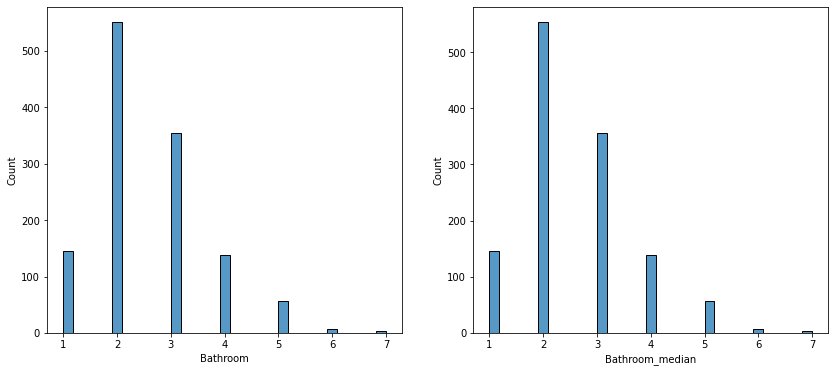

In [14]:
fig, axs = plt.subplots(ncols=2,figsize=(14,6))
sns.histplot(data=data ,x='Bathroom',  ax=axs[0])
sns.histplot(data=data ,x='Bathroom_median',  ax=axs[1])

<AxesSubplot:xlabel='Parking_median', ylabel='Count'>

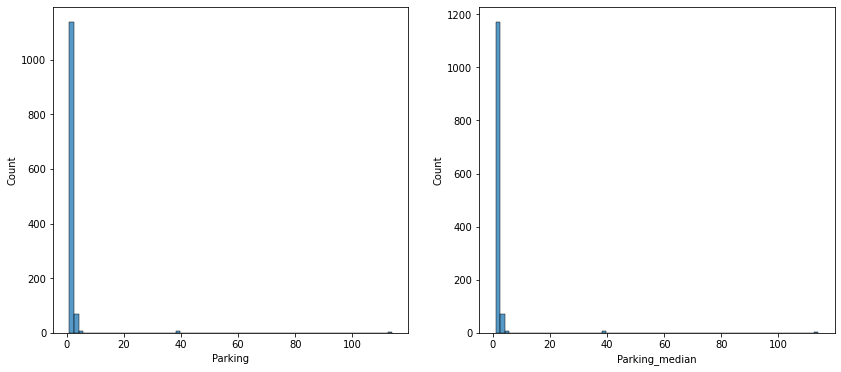

In [15]:
fig, axs = plt.subplots(ncols=2,figsize=(14,6))
sns.histplot(data=data ,x='Parking',  ax=axs[0],bins=70)
sns.histplot(data=data ,x='Parking_median',  ax=axs[1],bins=70)

<AxesSubplot:xlabel='Per_Sqftmean', ylabel='Count'>

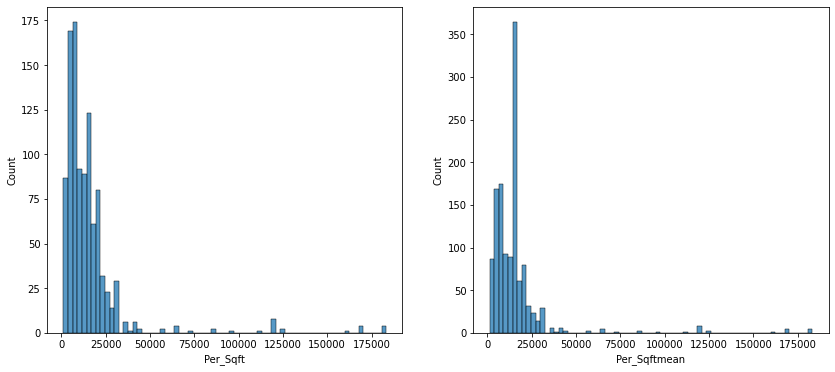

In [16]:
fig, axs = plt.subplots(ncols=2,figsize=(14,6))
sns.histplot(data=data ,x='Per_Sqft',  ax=axs[0],bins=70)
sns.histplot(data=data ,x='Per_Sqftmean',  ax=axs[1],bins=70)

In [17]:
impute_nan_median(data,['Per_Sqft'])

<AxesSubplot:xlabel='Per_Sqft_median', ylabel='Count'>

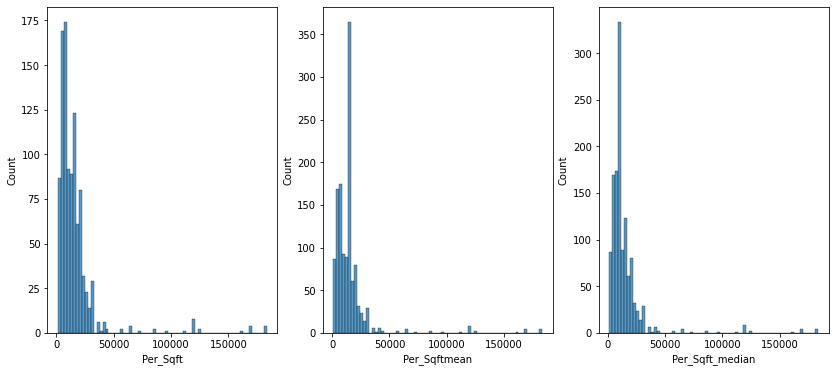

In [18]:
fig, axs = plt.subplots(ncols=3,figsize=(14,6))
sns.histplot(data=data ,x='Per_Sqft',  ax=axs[0],bins=70)
sns.histplot(data=data ,x='Per_Sqftmean',  ax=axs[1],bins=70)
sns.histplot(data=data ,x='Per_Sqft_median',  ax=axs[2],bins=70)

#### here median imputer looking well for all numeric columns
#### removing unnecessary columns

In [19]:
data.drop(['Per_Sqft','Per_Sqftmean','Parking','Bathroom'],axis=1,inplace=True)

### handling null values catagorical data

In [20]:
columns_object = data.select_dtypes(include='object')
columns_object.dtypes

Furnishing     object
Locality       object
Status         object
Transaction    object
Type           object
dtype: object

In [21]:
columns_object.isna().sum()

Furnishing     5
Locality       0
Status         0
Transaction    0
Type           5
dtype: int64

In [22]:
columns_object.describe()

,Furnishing,Locality,Status,Transaction,Type
count,1254,1259,1259,1259,1254
unique,3,365,2,2,2
top,Semi-Furnished,Lajpat Nagar 3,Ready_to_move,Resale,Builder_Floor
freq,708,34,1184,781,661


In [23]:
columns_object.Type.value_counts().index[0]

'Builder_Floor'

In [24]:
def impute_nan_freq(dataset,features):
    '''Replacing nan with its most frequent catagery'''
    for feature in features:
        freq = dataset[feature].value_counts().index[0]
        dataset[feature+"_freq"] = dataset[feature].fillna(freq)

In [25]:
impute_nan_freq(data,['Furnishing','Type'])

<AxesSubplot:xlabel='Furnishing_freq', ylabel='count'>

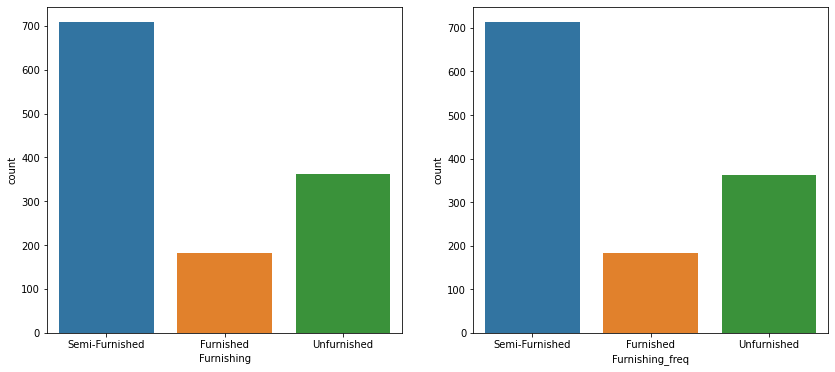

In [26]:
fig, axs = plt.subplots(ncols=2,figsize=(14,6))
sns.countplot(data=data ,x='Furnishing',  ax=axs[0])
sns.countplot(data=data ,x='Furnishing_freq',  ax=axs[1])

<AxesSubplot:xlabel='Type_freq', ylabel='count'>

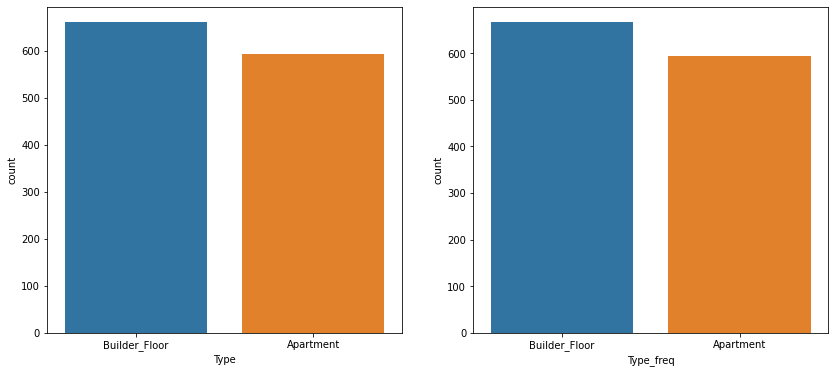

In [27]:
fig, axs = plt.subplots(ncols=2,figsize=(14,6))
sns.countplot(data=data ,x='Type',  ax=axs[0])
sns.countplot(data=data ,x='Type_freq',  ax=axs[1])

#### here frequency imputer looking well for all numeric columns
#### removing unnecessary columns

In [28]:
data.drop(['Furnishing','Type'],axis=1,inplace=True)

In [29]:
data.isna().any()

Area               False
BHK                False
Locality           False
Price              False
Status             False
Transaction        False
Bathroom_median    False
Parking_median     False
Per_Sqft_median    False
Furnishing_freq    False
Type_freq          False
dtype: bool

### Finally all nan value are vanished.....

## Analysis

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             1259 non-null   float64
 1   BHK              1259 non-null   int64  
 2   Locality         1259 non-null   object 
 3   Price            1259 non-null   int64  
 4   Status           1259 non-null   object 
 5   Transaction      1259 non-null   object 
 6   Bathroom_median  1259 non-null   float64
 7   Parking_median   1259 non-null   float64
 8   Per_Sqft_median  1259 non-null   float64
 9   Furnishing_freq  1259 non-null   object 
 10  Type_freq        1259 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


<AxesSubplot:xlabel='Area', ylabel='Count'>

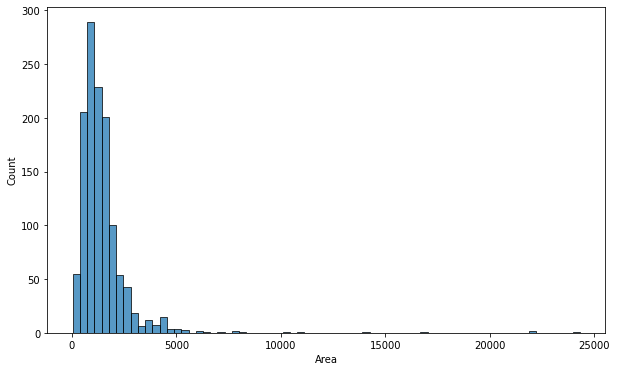

In [31]:
ax,fig = plt.subplots(figsize=(10,6))
sns.histplot(data= data, x='Area', bins=70)

<AxesSubplot:xlabel='Per_Sqft_median', ylabel='Count'>

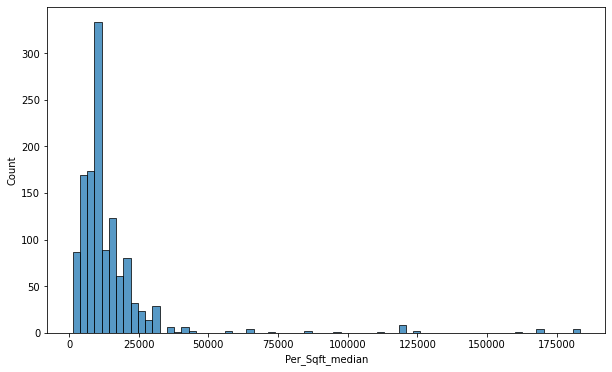

In [32]:
ax,fig = plt.subplots(figsize=(10,6))
sns.histplot(data= data, x='Per_Sqft_median', bins=70)

<AxesSubplot:xlabel='Price'>

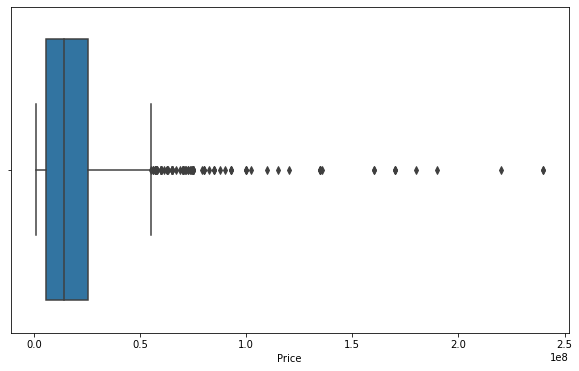

In [33]:
ax,fig = plt.subplots(figsize=(10,6))
sns.boxplot(data= data, x='Price' )

<AxesSubplot:xlabel='BHK', ylabel='Price'>

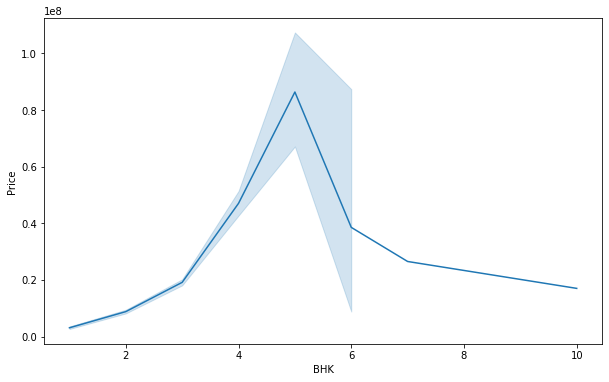

In [34]:
ax,fig = plt.subplots(figsize=(10,6))
sns.lineplot(data= data,y='Price', x='BHK')

<AxesSubplot:xlabel='Furnishing_freq', ylabel='Price'>

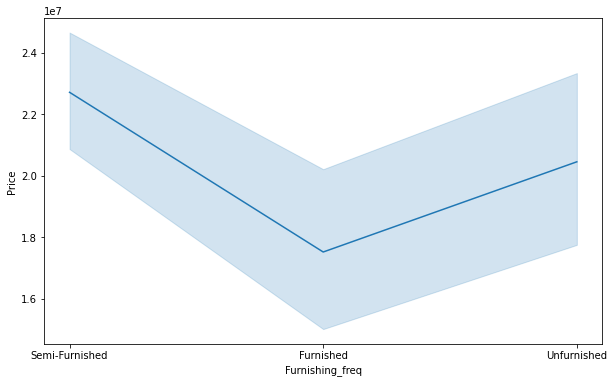

In [35]:
ax,fig = plt.subplots(figsize=(10,6))
sns.lineplot(data= data,y='Price', x='Furnishing_freq')

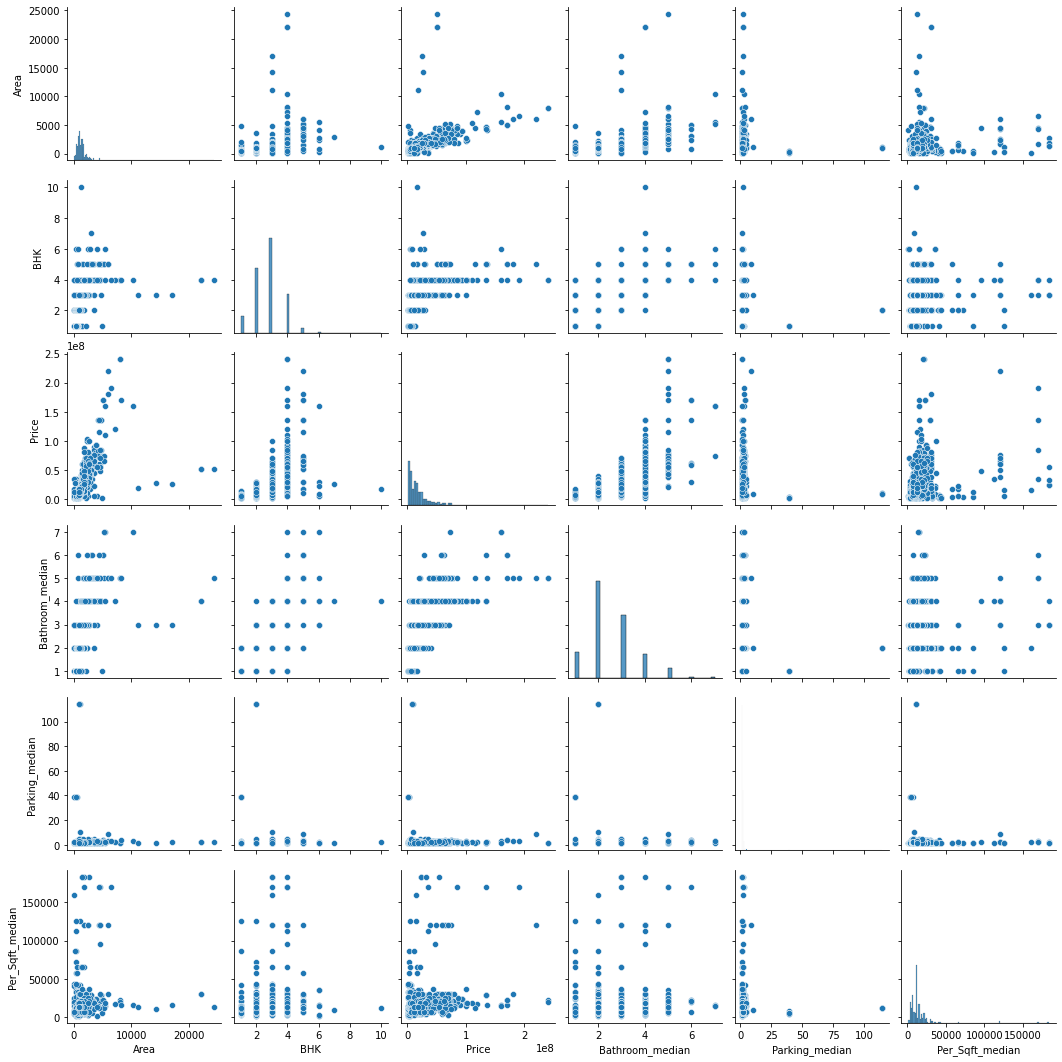

In [36]:
sns.pairplot(data)

In [37]:
data.groupby(['BHK'])[['Area','Price']].mean()

,Area,Price
BHK,,
1,501.304442,3.080625e+06
2,828.455216,8.790409e+06
3,1418.258662,1.912837e+07
4,2774.212512,4.703759e+07
5,3575.074074,8.636296e+07
6,2632.333333,3.855000e+07
7,2970.000000,2.650000e+07
10,1200.000000,1.700000e+07


In [38]:
data.groupby(['Furnishing_freq'])[['Area','Price']].mean()

,Area,Price
Furnishing_freq,,
Furnished,1285.768096,1.752164e+07
Semi-Furnished,1565.271960,2.271252e+07
Unfurnished,1363.442179,2.045358e+07


In [39]:
df_locality = data.groupby(['Locality'])[['Price']].mean().sort_values("Price")
df_locality

,Price
Locality,
Narela Sector A5,1.000000e+06
"Narela Sector A1 carpet area 42 sqyrd status Ready to Move floor Ground out of 5 floors transaction Resale furnishing Unfurnished facing North - East overlooking Garden/Park, Main Road car parking 2 Open bathroom 2 balcony 2 ownership Freehold Near bawana industrial area and j.j. colony. DDA Housing property LIG FLAT very nice property for single family 200 hundreds family already living IN THIS SOCIETY and very piece full atmosphere this society 24 hour guards all facility available read more Contact Owner View Phone No. Share Feedback Owner Vivek Gupta",1.500000e+06
Narela Mandi,1.500000e+06
"Zakir Nagar, New Friends Colony",1.500000e+06
"Baljit Nagar, Patel Nagar",1.550000e+06
...,...
"Maharani Bagh, New Friends Colony",1.214286e+08
"Orchid Metropolis, Hauz Khas",1.350000e+08
Greater Kailash 2,1.700000e+08


## Feature Encoding

In [40]:
data_object_columns = data.select_dtypes(include='object')
data_object_columns.dtypes

Locality           object
Status             object
Transaction        object
Furnishing_freq    object
Type_freq          object
dtype: object

In [41]:
data_object_columns.describe()

,Locality,Status,Transaction,Furnishing_freq,Type_freq
count,1259,1259,1259,1259,1259
unique,365,2,2,3,2
top,Lajpat Nagar 3,Ready_to_move,Resale,Semi-Furnished,Builder_Floor
freq,34,1184,781,713,666


In [42]:
# One Hot Encoding for "Status", "Transaction", Furnishing_freq and "Type_freq"

data_new = pd.get_dummies(data=data,columns=["Status", "Transaction", "Type_freq" ,"Furnishing_freq"],drop_first=True)

In [43]:
data_new.shape

(1259, 12)

#### First we have to remove similar locality

In [44]:
data['Locality'].value_counts().head(50).index.unique()

Index(['Lajpat Nagar 3', 'Lajpat Nagar 2',
       'J R Designers Floors, Rohini Sector 24',
       'Kailash Colony, Greater Kailash', 'Yamuna Vihar, Shahdara',
       'Laxmi Nagar', 'Chittaranjan Park', 'Mehrauli', 'Saket', 'Alaknanda',
       'DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road',
       'Safdarjung Enclave', 'The Amaryllis, Karol Bagh',
       'Sheikh Sarai Phase 1', 'Chhattarpur', 'Dilshad Colony, Dilshad Garden',
       'Common Wealth Games Village, Commonwealth Games Village 2010',
       'Mahavir Enclave Part 1', 'Patel Nagar West',
       'DLF Capital Greens, New Moti Nagar, Kirti Nagar',
       'New Moti Nagar, Kirti Nagar', 'New Friends Colony', 'Malviya Nagar',
       'Vasundhara Enclave', 'Hauz Khas', 'Sukhdev Vihar, Okhla',
       'New Manglapuri, Sultanpur', 'Vasant Kunj', 'Rohini Sector 24',
       'Mahavir Enclave', 'The Leela Sky Villas, Patel Nagar',
       'Narmada Apartment, Alaknanda', 'DDA Lig Flats, Narela',
       'Punjabi Bagh West', 'Narela', 'Ut

#### renaming of Location for removing similar values

In [45]:
loc_list= ['Lajpat Nagar',
           'Rohini Sector',
           'Greater Kailash', 'Shahdara',
           'Laxmi Nagar', 'Mehrauli', 'Chittaranjan Park', 'Saket', 'Alaknanda',
           'Sarita Vihar',
           'Safdarjung', 'Karol Bagh',
           'Sheikh Sarai', 'Chhattarpur', 'Dilshad Garden',
           'Patel Nagar',
           'Kirti Nagar',
           'Kirti Nagar', 'New Friends Colony', 'Malviya Nagar',
           'Okhla', 'Hauz Khas', 'Vasundhara',
           'Sultanpur', 'Vasant Kunj',
           'Patel Nagar', 'Alaknanda',
           'Mahavir', 'Rohini Sector', 'Uttam Nagar',
           'Punjabi Bagh', 'Narela',
           'Kalkaji', 'Hauz Khas',
           'Budh Vihar', 'Malviya Nagar',
           'Chhattarpur', 'Shahdara', 'Lajpat Nagar',
           'Patel Nagar', 'Kalkaji',
           'Commonwealth Games Village', 'New Friends Colony',
           'Sultanpur', 'Paschim Vihar', 'Budh Vihar']

In [46]:
loc_list = set(loc_list)

In [47]:
location_list = []
for x in loc_list:
    location_list.append(x)
    
location_list

['Uttam Nagar',
 'Commonwealth Games Village',
 'Punjabi Bagh',
 'Mahavir',
 'Rohini Sector',
 'Narela',
 'Hauz Khas',
 'Karol Bagh',
 'Paschim Vihar',
 'Alaknanda',
 'Malviya Nagar',
 'Safdarjung',
 'Shahdara',
 'Saket',
 'Sheikh Sarai',
 'Sarita Vihar',
 'Chittaranjan Park',
 'Greater Kailash',
 'Sultanpur',
 'Laxmi Nagar',
 'Kirti Nagar',
 'Vasundhara',
 'Chhattarpur',
 'Okhla',
 'Dilshad Garden',
 'Mehrauli',
 'Patel Nagar',
 'New Friends Colony',
 'Vasant Kunj',
 'Lajpat Nagar',
 'Budh Vihar',
 'Kalkaji']

In [48]:
df_loc = pd.DataFrame(data['Locality'].unique(),columns=['catagories'])
df_loc

,catagories
0,Rohini Sector 25
1,"J R Designers Floors, Rohini Sector 24"
2,"Citizen Apartment, Rohini Sector 13"
3,Rohini Sector 24
4,Rohini Sector 24 carpet area 650 sqft status R...
...,...
360,"Arya Chittaranjan Park, Chittaranjan Park"
361,Chittaranjan Park carpet area 1200 sqft status...
362,Chittaranjan Park carpet area 270 sqyrd status...
363,"Nehru Enclave, Kalkaji"


In [49]:
df_loc.set_index('catagories',inplace=True)

In [50]:
df_loc

""
catagories
Rohini Sector 25
"J R Designers Floors, Rohini Sector 24"
"Citizen Apartment, Rohini Sector 13"
Rohini Sector 24
"Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge"
...
"Arya Chittaranjan Park, Chittaranjan Park"
Chittaranjan Park carpet area 1200 sqft status Ready to Move floor 2 out of 4 floors transaction New Property furnishing Semi-Furnished facing North - East overlooking Garden/Park bathroom 3 balcony 2 ownership Freehold Newly Constructed Property Newly Constructed Property brand new 1st floor 3bedroom attach bathrooms stilt car parking modular kitchen air condition prime location c r park read more Contact Agent View Phone No. Share Feedback Nirmala Associates Certified Agent Trusted by Users Genuine Listings 1500+ Buyers Served
"Chittaranjan Park carpet area 270 sqyrd status Ready to Move floor 2 out of 4 floors transaction Resale furnishing Furnished facing North - East overlooking Garden/Park, Main Road car parking 5 Open bathroom 4 balcony 3 ownership Freehold 3 Side Open, Fully ventilated, Close to Market, Above Bank and 24 x 7 ATM because of which good security. Elite Neighbor hood. Very good for Rental Income. Also can be used for commercial Office Purpose by Advocates. read more Contact Owner View Phone No. Share Feedback Owner Mayur Mayur Aggarwal"


In [51]:
value_enco = []
a = 0
for row in df_loc.index:
    for j in location_list:
        if (j in row)==True:
            value_enco.append([row,j])
            
            
value_enco

[['Rohini Sector 25', 'Rohini Sector'],
 ['J R Designers Floors, Rohini Sector 24', 'Rohini Sector'],
 ['Citizen Apartment, Rohini Sector 13', 'Rohini Sector'],
 ['Rohini Sector 24', 'Rohini Sector'],
 ['Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge',
  'Rohini Sector'],
 ['Delhi Homes, Rohini Sector 24', 'Rohini Sector'],
 ['Rohini Sector 21', 'Rohini Sector'],
 ['Rohini Sector 22', 'Rohini Sector'],
 ['Rohini Sector 20', 'Rohin

In [52]:
df_loc2 = pd.DataFrame(value_enco)
df_loc2

,0,1
0,Rohini Sector 25,Rohini Sector
1,"J R Designers Floors, Rohini Sector 24",Rohini Sector
2,"Citizen Apartment, Rohini Sector 13",Rohini Sector
3,Rohini Sector 24,Rohini Sector
4,Rohini Sector 24 carpet area 650 sqft status R...,Rohini Sector
...,...,...
294,"Arya Chittaranjan Park, Chittaranjan Park",Chittaranjan Park
295,Chittaranjan Park carpet area 1200 sqft status...,Chittaranjan Park
296,Chittaranjan Park carpet area 270 sqyrd status...,Chittaranjan Park
297,"Nehru Enclave, Kalkaji",Kalkaji


In [53]:
df_loc2.columns = ['cat','new_cat']
df_loc2

,cat,new_cat
0,Rohini Sector 25,Rohini Sector
1,"J R Designers Floors, Rohini Sector 24",Rohini Sector
2,"Citizen Apartment, Rohini Sector 13",Rohini Sector
3,Rohini Sector 24,Rohini Sector
4,Rohini Sector 24 carpet area 650 sqft status R...,Rohini Sector
...,...,...
294,"Arya Chittaranjan Park, Chittaranjan Park",Chittaranjan Park
295,Chittaranjan Park carpet area 1200 sqft status...,Chittaranjan Park
296,Chittaranjan Park carpet area 270 sqyrd status...,Chittaranjan Park
297,"Nehru Enclave, Kalkaji",Kalkaji


In [54]:
df_loc2.set_index('cat',inplace=True)

In [55]:
df_location = pd.merge(df_loc, df_loc2,  how='left',left_index=True,right_index=True)
df_location

,new_cat
"APL Builder Floor, Greater Kailash 1",Greater Kailash
"Aashirwaad Chowk, Dwarka",NaN
"Abhimanyu Apartments, Vasundhara Enclave",Vasundhara
"Abul Fazal Enclave Part 1, Okhla",Okhla
"Abul Fazal Enclave Part-II, Okhla",Okhla
...,...
"Vishwas Nagar, Shahdara",Shahdara
"Yamuna Apartment, Alaknanda",Alaknanda
"Yamuna Vihar, Shahdara",Shahdara
"Zakir Nagar, New Friends Colony",New Friends Colony


In [56]:
df_location['new_cat'].isna().sum()

68

In [57]:
df_location.fillna('other',inplace=True)

In [58]:
df_location.new_cat.unique()

array(['Greater Kailash', 'other', 'Vasundhara', 'Okhla', 'Shahdara',
       'Alaknanda', 'Lajpat Nagar', 'Mehrauli', 'Saket', 'Sheikh Sarai',
       'Chhattarpur', 'Paschim Vihar', 'Safdarjung', 'Chittaranjan Park',
       'Patel Nagar', 'Laxmi Nagar', 'Karol Bagh', 'Punjabi Bagh',
       'Narela', 'Budh Vihar', 'Rohini Sector',
       'Commonwealth Games Village', 'Dilshad Garden', 'Vasant Kunj',
       'Sarita Vihar', 'Kalkaji', 'Kirti Nagar', 'New Friends Colony',
       'Malviya Nagar', 'Hauz Khas', 'Uttam Nagar', 'Mahavir',
       'Sultanpur'], dtype=object)

In [59]:
dictionary = df_location.new_cat.to_dict()
dictionary

{'APL Builder Floor, Greater Kailash 1': 'Greater Kailash',
 'Aashirwaad Chowk, Dwarka': 'other',
 'Abhimanyu Apartments, Vasundhara Enclave': 'Vasundhara',
 'Abul Fazal Enclave Part 1, Okhla': 'Okhla',
 'Abul Fazal Enclave Part-II, Okhla': 'Okhla',
 'Adarsh Homes, Dwarka Mor': 'other',
 'Ahinsha Vatika, Ram Nagar, Shahdara': 'Shahdara',
 'Alaknanda': 'Alaknanda',
 'Amar Colony, Lajpat Nagar': 'Lajpat Nagar',
 'Andheria Mor, Mehrauli': 'Mehrauli',
 'Anekant Apartment, Vasundhara Enclave': 'Vasundhara',
 'Anupam Enclave, Saket': 'Saket',
 'Apna Apartments, Savitri Nagar Village, Sheikh Sarai': 'Sheikh Sarai',
 'Aravali Apartments, Alaknanda': 'Alaknanda',
 'Aravali Tower, Chhattarpur': 'Chhattarpur',
 'Archana Apartment, Paschim Vihar': 'Paschim Vihar',
 'Arjun Nagar, Safdarjung Enclave': 'Safdarjung',
 'Arya Chittaranjan Park, Chittaranjan Park': 'Chittaranjan Park',
 'Ashirwad Apartments, Dwarka': 'other',
 'Ashirwad Apartments, Dwarka Sector 12': 'other',
 'Ashoka Apartment, Paschim 

In [60]:
data_new['Locality_encode']= data['Locality'].map(dictionary)

In [61]:
data_new.shape

(1259, 13)

In [62]:
data_new.columns

Index(['Area', 'BHK', 'Locality', 'Price', 'Bathroom_median', 'Parking_median',
       'Per_Sqft_median', 'Status_Ready_to_move', 'Transaction_Resale',
       'Type_freq_Builder_Floor', 'Furnishing_freq_Semi-Furnished',
       'Furnishing_freq_Unfurnished', 'Locality_encode'],
      dtype='object')

In [63]:
data_new[['Locality','Locality_encode']]

,Locality,Locality_encode
0,Rohini Sector 25,Rohini Sector
1,"J R Designers Floors, Rohini Sector 24",Rohini Sector
2,"Citizen Apartment, Rohini Sector 13",Rohini Sector
3,Rohini Sector 24,Rohini Sector
4,Rohini Sector 24 carpet area 650 sqft status R...,Rohini Sector
...,...,...
1254,Chittaranjan Park,Chittaranjan Park
1255,Chittaranjan Park,Chittaranjan Park
1256,Chittaranjan Park,Chittaranjan Park
1257,Chittaranjan Park Block A,Chittaranjan Park


In [64]:
data_new.Locality_encode.unique()

array(['Rohini Sector', 'other', 'Lajpat Nagar', 'Budh Vihar',
       'Patel Nagar', 'Uttam Nagar', 'Greater Kailash', 'Okhla',
       'Karol Bagh', 'Vasant Kunj', 'New Friends Colony', 'Shahdara',
       'Laxmi Nagar', 'Saket', 'Safdarjung', 'Paschim Vihar',
       'Commonwealth Games Village', 'Alaknanda', 'Sarita Vihar',
       'Sultanpur', 'Chhattarpur', 'Mehrauli', 'Mahavir', 'Narela',
       'Malviya Nagar', 'Dilshad Garden', 'Vasundhara', 'Kirti Nagar',
       'Sheikh Sarai', 'Punjabi Bagh', 'Kalkaji', 'Hauz Khas',
       'Chittaranjan Park'], dtype=object)

In [65]:
data_new.drop(columns=['Locality'],inplace=True)

#### After handling similar values we want to encode them 
#### for this we use Mean Encoding (replacing each catagory with its mean Price)

In [66]:
round(data_new.groupby(data_new['Locality_encode'])['Price'].mean())

Locality_encode
Alaknanda                     18007143.0
Budh Vihar                     3825000.0
Chhattarpur                    8783000.0
Chittaranjan Park             26335714.0
Commonwealth Games Village    45646667.0
Dilshad Garden                 7226000.0
Greater Kailash               50513636.0
Hauz Khas                     73134615.0
Kalkaji                       13361290.0
Karol Bagh                    21173125.0
Kirti Nagar                   24520000.0
Lajpat Nagar                  27556778.0
Laxmi Nagar                    5966176.0
Mahavir                        4108000.0
Malviya Nagar                 33150000.0
Mehrauli                       4736667.0
Narela                         2429667.0
New Friends Colony            72709677.0
Okhla                         20601471.0
Paschim Vihar                 15759000.0
Patel Nagar                   35876389.0
Punjabi Bagh                  33103333.0
Rohini Sector                  8895972.0
Safdarjung                    42411765.0


In [67]:
loc_weights = round(data_new.groupby(data_new['Locality_encode'])['Price'].mean()).to_dict()
loc_weights

{'Alaknanda': 18007143.0,
 'Budh Vihar': 3825000.0,
 'Chhattarpur': 8783000.0,
 'Chittaranjan Park': 26335714.0,
 'Commonwealth Games Village': 45646667.0,
 'Dilshad Garden': 7226000.0,
 'Greater Kailash': 50513636.0,
 'Hauz Khas': 73134615.0,
 'Kalkaji': 13361290.0,
 'Karol Bagh': 21173125.0,
 'Kirti Nagar': 24520000.0,
 'Lajpat Nagar': 27556778.0,
 'Laxmi Nagar': 5966176.0,
 'Mahavir': 4108000.0,
 'Malviya Nagar': 33150000.0,
 'Mehrauli': 4736667.0,
 'Narela': 2429667.0,
 'New Friends Colony': 72709677.0,
 'Okhla': 20601471.0,
 'Paschim Vihar': 15759000.0,
 'Patel Nagar': 35876389.0,
 'Punjabi Bagh': 33103333.0,
 'Rohini Sector': 8895972.0,
 'Safdarjung': 42411765.0,
 'Saket': 34876667.0,
 'Sarita Vihar': 14507143.0,
 'Shahdara': 11036267.0,
 'Sheikh Sarai': 13056667.0,
 'Sultanpur': 5711111.0,
 'Uttam Nagar': 3472692.0,
 'Vasant Kunj': 20433333.0,
 'Vasundhara': 11105000.0,
 'other': 12942544.0}

In [68]:
data_new['Locality_encoder'] = data_new['Locality_encode'].map(loc_weights)

In [69]:
data_new[['Locality_encoder','Locality_encode']]

,Locality_encoder,Locality_encode
0,8895972.0,Rohini Sector
1,8895972.0,Rohini Sector
2,8895972.0,Rohini Sector
3,8895972.0,Rohini Sector
4,8895972.0,Rohini Sector
...,...,...
1254,26335714.0,Chittaranjan Park
1255,26335714.0,Chittaranjan Park
1256,26335714.0,Chittaranjan Park
1257,26335714.0,Chittaranjan Park


In [70]:
data_new.drop('Locality_encode',axis=1,inplace = True)

In [71]:
# we want this data for deployment purpose

data_new.to_csv('dataset.csv',index=False)

## Feature selection

#### Feature Importance

In [72]:
# splitting data in dependent(target) and independent feature

X = data_new.drop(axis=1, columns=['Price'])
y = data_new['Price']

In [73]:
X.shape

(1259, 11)

In [74]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [75]:
'''feature importance'''

model.feature_importances_

array([0.23678361, 0.10592996, 0.32686109, 0.02906706, 0.03160411,
       0.01799526, 0.0317422 , 0.01249433, 0.00849961, 0.0061204 ,
       0.19290238])

In [76]:
feature_importance = pd.DataFrame({'Column':X.columns,'Importance':model.feature_importances_})
feature_importance.head()

,Column,Importance
0,Area,0.236784
1,BHK,0.105930
2,Bathroom_median,0.326861
3,Parking_median,0.029067
4,Per_Sqft_median,0.031604


In [77]:
feature_importance.sort_values('Importance',ascending=False)

,Column,Importance
2,Bathroom_median,0.326861
0,Area,0.236784
10,Locality_encoder,0.192902
1,BHK,0.105930
6,Transaction_Resale,0.031742
4,Per_Sqft_median,0.031604
3,Parking_median,0.029067
5,Status_Ready_to_move,0.017995
7,Type_freq_Builder_Floor,0.012494
8,Furnishing_freq_Semi-Furnished,0.008500


#### Information Gain

In [78]:
'''sklearn library to find highly correlate feature '''

from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X,y)

mutual_info_df = pd.DataFrame({'column':X.columns,'info':mutual_info})
mutual_info_df.head()

,column,info
0,Area,0.908878
1,BHK,0.495865
2,Bathroom_median,0.573892
3,Parking_median,0.123315
4,Per_Sqft_median,0.361788


In [79]:
mutual_info_df.sort_values('info')

,column,info
9,Furnishing_freq_Unfurnished,0.022233
8,Furnishing_freq_Semi-Furnished,0.025709
5,Status_Ready_to_move,0.058654
7,Type_freq_Builder_Floor,0.071837
6,Transaction_Resale,0.109157
3,Parking_median,0.123315
4,Per_Sqft_median,0.361788
1,BHK,0.495865
2,Bathroom_median,0.573892
10,Locality_encoder,0.680287


#### Univariate Selection

In [80]:
'''we used sklearn.feature_selection library'''

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_rank_feature = SelectKBest(score_func=chi2, k=11)      # taking k = 11 beacause there are 11 independent features

ordered_rank = ordered_rank_feature.fit(X, y)
best_feature = pd.DataFrame({'column':X.columns,'Scores':ordered_rank.scores_})
best_feature.head()

,column,Scores
0,Area,1.252018e+06
1,BHK,2.668452e+02
2,Bathroom_median,4.176804e+02
3,Parking_median,5.070641e+03
4,Per_Sqft_median,1.020686e+07


In [81]:
best_feature.sort_values('Scores',ascending=False)

,column,Scores
10,Locality_encoder,1.122387e+10
4,Per_Sqft_median,1.020686e+07
0,Area,1.252018e+06
3,Parking_median,5.070641e+03
2,Bathroom_median,4.176804e+02
1,BHK,2.668452e+02
9,Furnishing_freq_Unfurnished,2.581092e+02
7,Type_freq_Builder_Floor,2.156463e+02
6,Transaction_Resale,1.734620e+02
8,Furnishing_freq_Semi-Furnished,1.485231e+02


#### correlation

In [82]:
corr = X.corr()
corr

,Area,BHK,Bathroom_median,Parking_median,Per_Sqft_median,Status_Ready_to_move,Transaction_Resale,Type_freq_Builder_Floor,Furnishing_freq_Semi-Furnished,Furnishing_freq_Unfurnished,Locality_encoder
Area,1.000000,0.449438,0.534964,-0.008595,0.164069,-0.157769,-0.116283,0.092115,0.072045,-0.041830,0.406169
BHK,0.449438,1.000000,0.772506,-0.068635,0.164655,-0.120472,-0.137574,0.110784,0.078920,-0.125325,0.388879
Bathroom_median,0.534964,0.772506,1.000000,-0.030513,0.208411,-0.142970,-0.197450,0.136374,0.104888,-0.076689,0.561024
Parking_median,-0.008595,-0.068635,-0.030513,1.000000,-0.006080,0.016427,0.033411,-0.073647,-0.048781,0.077911,-0.021824
Per_Sqft_median,0.164069,0.164655,0.208411,-0.006080,1.000000,-0.023863,-0.034988,0.086681,0.022056,-0.012954,0.358029
Status_Ready_to_move,-0.157769,-0.120472,-0.142970,0.016427,-0.023863,1.000000,0.259478,0.031425,0.064153,-0.076865,-0.034490
Transaction_Resale,-0.116283,-0.137574,-0.197450,0.033411,-0.034988,0.259478,1.000000,-0.226707,-0.149597,0.053542,-0.124095
Type_freq_Builder_Floor,0.092115,0.110784,0.136374,-0.073647,0.086681,0.031425,-0.226707,1.000000,0.105410,-0.052776,0.193758
Furnishing_freq_Semi-Furnished,0.072045,0.078920,0.104888,-0.048781,0.022056,0.064153,-0.149597,0.105410,1.000000,-0.727357,0.102605
Furnishing_freq_Unfurnished,-0.041830,-0.125325,-0.076689,0.077911,-0.012954,-0.076865,0.053542,-0.052776,-0.727357,1.000000,-0.007302


<AxesSubplot:>

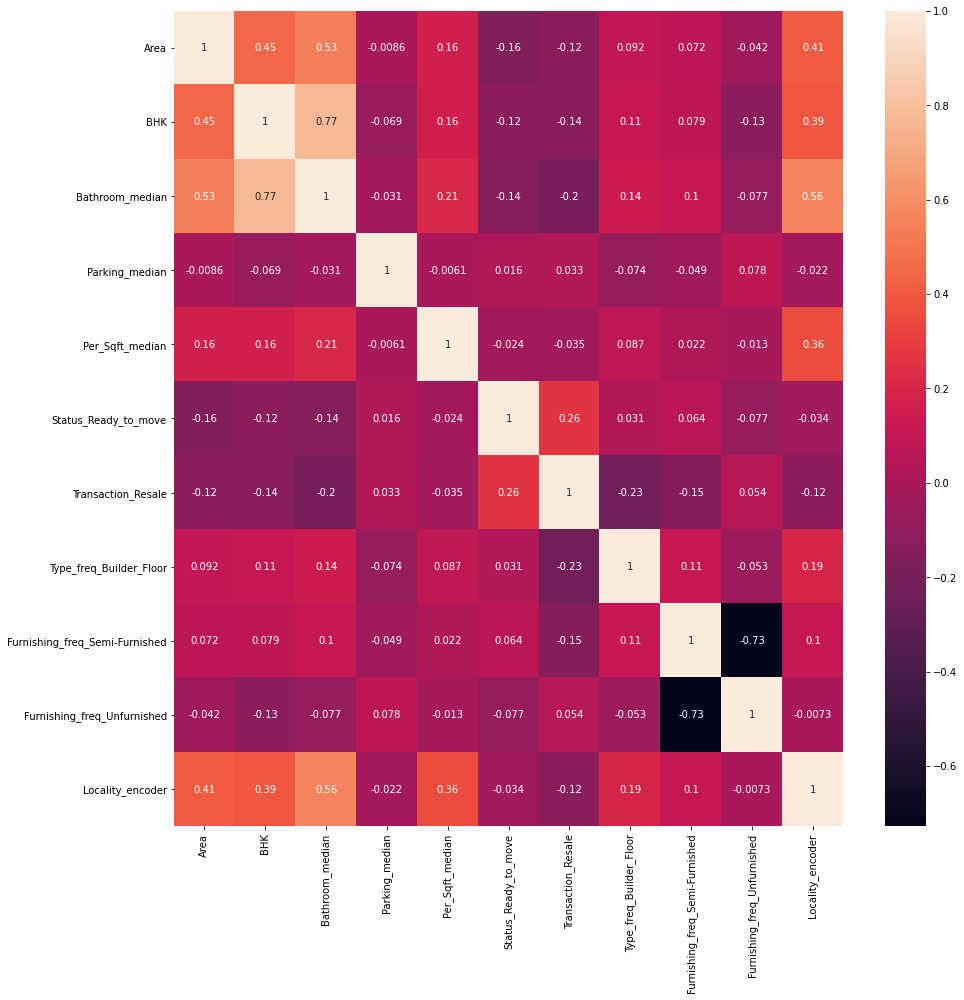

In [83]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

#### All this features are Important

### Feature Scaling

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [86]:
scaler.fit(X)

StandardScaler()

In [87]:
X_new = scaler.transform(X)

In [88]:
X_new = pd.DataFrame(X_new,columns=X.columns)

In [89]:
X_new.head()

,Area,BHK,Bathroom_median,Parking_median,Per_Sqft_median,Status_Ready_to_move,Transaction_Resale,Type_freq_Builder_Floor,Furnishing_freq_Semi-Furnished,Furnishing_freq_Unfurnished,Locality_encoder
0,-0.425188,0.213130,-0.533227,-0.147045,-0.186467,0.251684,-1.278238,0.943605,0.875088,-0.636501,-0.742184
1,-0.457087,-0.835038,-0.533227,-0.147045,-0.428918,0.251684,-1.278238,-1.059765,0.875088,-0.636501,-0.742184
2,-0.329490,-0.835038,-0.533227,-0.147045,-0.428918,0.251684,0.782327,-1.059765,-1.142743,-0.636501,-0.742184
3,-0.552785,-0.835038,-0.533227,-0.147045,-0.428918,0.251684,0.782327,0.943605,0.875088,-0.636501,-0.742184
4,-0.520886,-0.835038,-0.533227,-0.147045,-0.428918,0.251684,-1.278238,0.943605,0.875088,-0.636501,-0.742184


## Splitting Data

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [91]:
X_train.shape

(1007, 11)

In [92]:
X_test.shape

(252, 11)

## Model Selection

In [93]:
# Linear Regresssion

from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train,y_train)

LinearRegression()

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
scores = cross_val_score(model_linear,X_train,y_train, cv=5, scoring ='r2')
scores

array([0.59509793, 0.64610308, 0.65740582, 0.60701958, 0.75825729])

In [96]:
scores.mean()

0.652776739376961

---

In [97]:
# Decision tree regressor

from sklearn.tree import DecisionTreeRegressor 

model_tree = DecisionTreeRegressor()
model_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [98]:
scores = cross_val_score(model_tree,X_train,y_train, cv=5, scoring ='r2')
scores

array([0.66351817, 0.81467585, 0.88208936, 0.77335163, 0.77523922])

In [99]:
scores.mean()

0.7817748451284412

---

In [100]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor 

model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [101]:
scores = cross_val_score(model_rf,X_train,y_train, cv=5, scoring ='r2')
scores

array([0.66702884, 0.85124154, 0.89812546, 0.77662427, 0.90131114])

In [102]:
scores.mean()

0.8188662489439397

---

In [103]:
# GBM

from sklearn.ensemble import GradientBoostingRegressor
model_gbm = GradientBoostingRegressor(n_estimators=200,random_state=42)

model_gbm.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=200, random_state=42)

In [104]:
scores = cross_val_score(model_gbm,X_train,y_train, cv=5, scoring ='r2')
scores

array([0.73281854, 0.85447645, 0.88647579, 0.81823264, 0.86716296])

In [105]:
scores.mean()

0.8318332744768743

___

In [106]:
# XGBOOST

from xgboost import XGBRegressor
model_xg = XGBRegressor(n_estimators=300,random_state=42)

model_xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
scores = cross_val_score(model_xg,X_train,y_train,scoring='r2',cv=5)
scores

array([0.6726794 , 0.86444605, 0.87747899, 0.79092738, 0.89261493])

In [108]:
scores.mean()

0.8196293510516984

---

In [109]:
# LightGBM

from lightgbm import LGBMRegressor
model_lg = LGBMRegressor(n_estimators=400,random_state=42)

model_lg.fit(X_train,y_train)

LGBMRegressor(n_estimators=400, random_state=42)

In [110]:
scores = cross_val_score(model_lg,X_train,y_train,scoring='r2',cv=5)
scores

array([0.69635453, 0.85882495, 0.85398685, 0.75535743, 0.85985183])

In [111]:
scores.mean()

0.8048751192227801

---

## Hyperparameter tuning on Random Forest, GBM and XGBOOST

In [112]:
# Random Forest


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [113]:
from sklearn.model_selection import RandomizedSearchCV

model_rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [114]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [115]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [116]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=1400)

In [117]:
scores = cross_val_score(rf_random.best_estimator_,X_train,y_train,scoring='r2',cv=5)
scores

array([0.81116064, 0.85610782, 0.85626155, 0.75977049, 0.89360399])

In [118]:
scores.mean()

0.835380897067273

---

In [120]:
#  GBM

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
max_leaf_nodes = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
bootstrap = [True, False]
learning_rate = [0.05,0.10,0.15,0.20,0.25,0.30]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate' : learning_rate,}


In [121]:
model_GBM = XGBRegressor()

rcv_GBM = RandomizedSearchCV(estimator = model_GBM, param_distributions = random_grid, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [122]:
model_GBM.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [123]:
rcv_GBM.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [124]:
rcv_GBM.best_params_

{'n_estimators': 200, 'max_depth': 40, 'learning_rate': 0.2}

In [125]:
rcv_GBM.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=40,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
scores = cross_val_score(rcv_GBM.best_estimator_,X_train,y_train,scoring='r2',cv=5)
scores

array([0.7645509 , 0.85508882, 0.89285788, 0.80599959, 0.88618237])

In [127]:
scores.mean()

0.8409359098240745

---

In [128]:
# XGBOOST

model_xg = XGBRegressor()

random_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
          "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
         "min_child_weight" : [ 1, 3, 5, 7 ],
         "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
         "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [129]:
f_xgb = RandomizedSearchCV(estimator = model_xg, param_distributions = random_grid, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [130]:
f_xgb.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [131]:
f_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=12,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
f_xgb.best_params_

{'min_child_weight': 3,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [133]:
scores = cross_val_score(f_xgb.best_estimator_,X_train,y_train,scoring='r2',cv=5)
scores

array([0.78060721, 0.86779843, 0.90822083, 0.81105555, 0.87452207])

In [134]:
scores.mean()

0.8484408187891166

### Here , XGBoost model have heighest accuracy so we will use it for final deployment

In [135]:
y_pred = f_xgb.best_estimator_.predict(X_test)

In [136]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
MSE

111724501009185.02

In [137]:
np.sqrt(MSE)

10569981.126245448

In [138]:
f_xgb.best_estimator_.score(X_test,y_test)

0.8522632299760878

In [139]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 5341925.83
Mean squared error = 111724501009185.02
Median absolute error = 2110785.0
Explain variance score = 0.85
R2 score = 0.85


In [143]:
#we choose XGBRegressor() for deployement

import pickle

file =  open('model_XGB.pkl','wb')

pickle.dump(f_xgb.best_estimator_,file)
file.close()